$Linkes$ $to$ $Connect$ $with$ $me$:👇👇👇👇👇👇👇

__[Rajesh Signh - Github-Profile](https://github.com/RAJESH6638)__
<br>
__[LinkedIn-Profile ](https://linkedin.com/in/rajesh-singh/)__

# Title: 
<div class="alert alert-block alert-info">
<b>Movie Correlation Project </b>
</div>

# *Objective:*
__*To analyze the relationships between various features of movies, such as budget, gross earnings, score, votes, <br>and runtime, and identify key factors that may influence a movie's success.*__


<div class="alert alert-block alert-info">
<b>Hypothesis:</b> A testable statement predicting the relationship between two or more variables.
</div>

<div class="alert alert-block alert-warning">
<b>Hypothesis 1:</b> Higher budgets are positively correlated with higher gross earnings, 
    suggesting that larger financial investments lead to better box office performance.
</div>

<div class="alert alert-block alert-warning">
<b>Hypothesis 2:</b> Movies with higher audience votes tend to have higher scores, 
    indicating a relationship between popularity and perceived quality.
</div>



<div class="alert alert-block alert-success">
<b>1. Importing Important Libraries</b> 
</div>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
from matplotlib.pyplot import figure 
matplotlib.rcParams['figure.figsize']  = (8, 4) # cofig. figure sizes

In [3]:
df = pd.read_csv('/Users/rajeshpanwar/Documents/DATA SCIENCE/Project/Movie dataset/movies.csv')
pd.set_option('display.max_rows', None)


<div class="alert alert-block alert-success">
<b>2. Let's Dive Into Data</b> 
</div>


In [7]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


 As we can see there are some descripencies in data type.
 So first, we will handle that.

In [10]:
# Checking for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{}-{}%". format(col,pct_missing.round()))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [12]:
# checking for duplicates
df  = df.drop_duplicates()
#df

In [14]:
# Changing the NaN/inf vlaues into zeros 
df['votes']= df["votes"].replace([np.nan, np.inf],0)
df['budget']= df["budget"].replace([np.nan, np.inf],0)
df['gross']= df["gross"].replace([np.nan, np.inf],0)

# Just to make clear name = movie name
df = df.rename(columns = {'name': 'movie'})

# then, amend data types  
df['votes']= df["votes"].astype('int64')
df['budget']= df["budget"].astype('int64')
df['gross']= df["gross"].astype('int64')

df.head()

,movie,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [16]:
# As there are some discrepancies in year or released feature, let's improve it

# Extract year using regex
df['Year_cor'] = df['released'].str.extract(r'(\d{4})')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie     7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7668 non-null   int64  
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    7668 non-null   int64  
 12  gross     7668 non-null   int64  
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
 15  Year_cor  7666 non-null   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 958.6+ KB


In [18]:
df = df.sort_values(by = ['gross'], inplace = False , ascending  = False)

<div class="alert alert-block alert-success">
<b>3. Plotting Graphs - Scatter plots: </b> Scatter plot is used to see the relationship between two or multiple variable
</div>

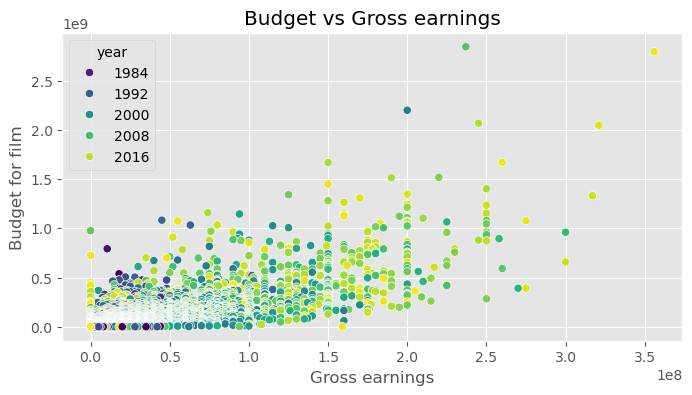

In [21]:
# using seaborn library
sns.scatterplot(data = df, x = 'budget', y = 'gross', hue="year", palette="viridis")
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

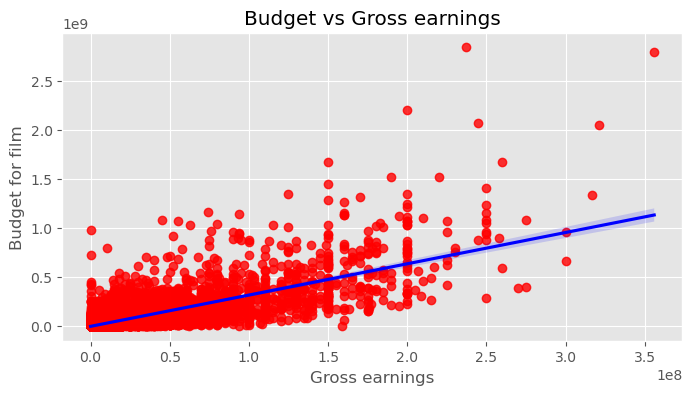

In [22]:
# Plot Budget vs Gross by regplot
sns.regplot(data=df, x='budget', y='gross', 
            scatter_kws={'color': 'red'}, 
            line_kws={'color': 'Blue'})
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

In [23]:
# Let's start looking at correlation
# 1. Pearosn, kendall, Spearman

In [25]:
numeric_col = df.describe() # I was facing ploting Correlation Matrix so,
                                # I have to use describe function to get the all numeric values. 
numeric_col.corr(method = 'kendall') # option - 1 
#numeric_col.corr(method = 'pearson') # option - 2 
#numeric_col.corr(method = 'spearman') # option - 3

,year,score,votes,budget,gross,runtime
year,1.000000,0.928571,0.214286,0.254588,0.142857,1.000000
score,0.928571,1.000000,0.142857,0.181848,0.071429,0.928571
votes,0.214286,0.142857,1.000000,0.909241,0.928571,0.214286
budget,0.254588,0.181848,0.909241,1.000000,0.836502,0.254588
gross,0.142857,0.071429,0.928571,0.836502,1.000000,0.142857
runtime,1.000000,0.928571,0.214286,0.254588,0.142857,1.000000


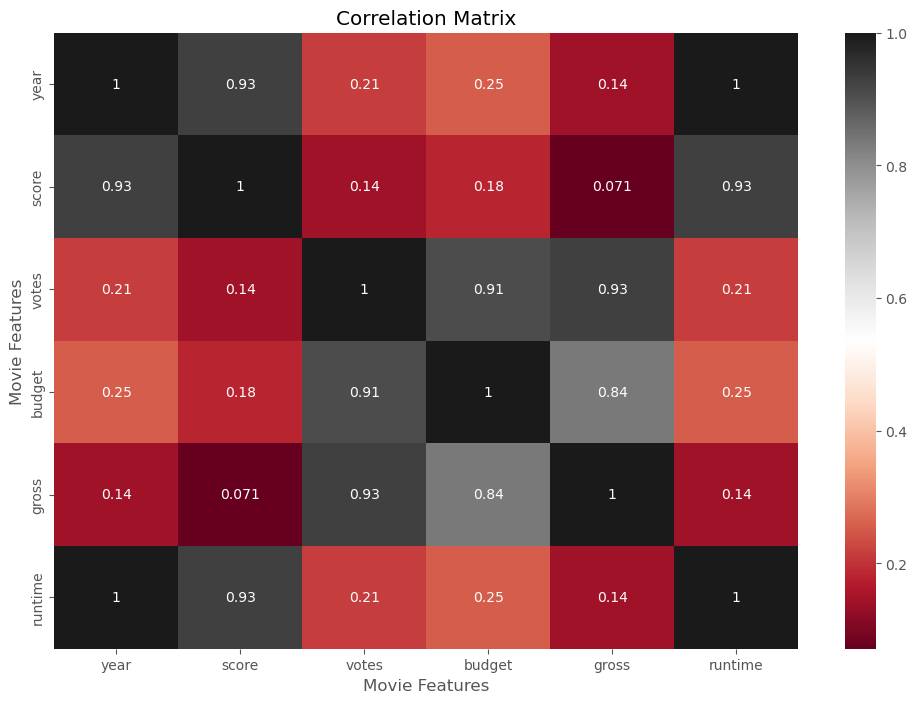

In [26]:
# Calculating the correlation matrix
corr_matrix = numeric_col.corr(method = 'kendall') 

# Create a heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix,annot=True, cmap='RdGy',)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

<div class="alert alert-block alert-danger">
<b>4. Converting Ojbect to Numeric :</b> It is not possible to plot object data points on a heatmap. To calculate the correlation between all values, the data points need to be converted into numeric format.
</div>

*These are the objects in the Dataframe:* <br>
`name` `rating` `genr` `release` `directo` `write` `sta` `countr` `compan`  

In [31]:
df.dtypes[df.dtypes == 'object']

movie       object
rating      object
genre       object
released    object
director    object
writer      object
star        object
country     object
company     object
Year_cor    object
dtype: object

In [34]:
df_num = df
for col_name in df_num.columns:
    if (df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category') # converting object to numeric 
        df_num[col_name] = df_num[col_name].cat.codes
df_num.head()

,movie,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_cor
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,38


<div class="alert alert-block alert-success">
<b>These processes 👇 are just for not being confused :</b> 
</div>

In [37]:
df = df_num # if not done, can caused confusion
df = df.sort_values(by = ['gross'], inplace = False , ascending  = False)  # if not done, can caused confusion
df.head()

,movie,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_cor
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,38



<div class="alert alert-block alert-success">
<b>5. Correlation of all the features to each other : </b> 
</div>


In [40]:
df_num.corr()

,movie,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_cor
movie,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.106295
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.309122,0.217782
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027606



<div class="alert alert-block alert-success">
<b>Using heatmap to show all numeric values: </b> 
</div>


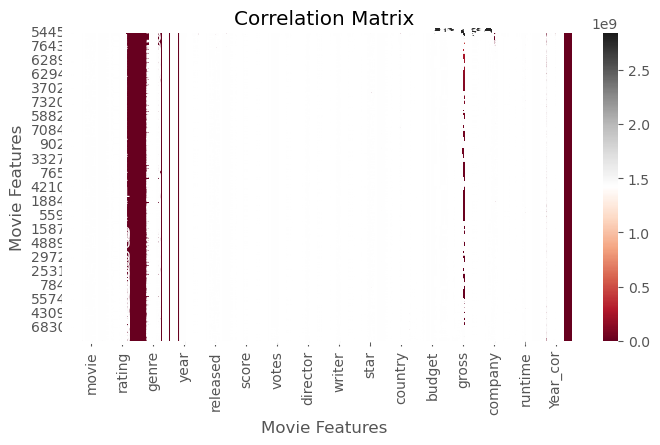

In [43]:
# Calculate the correlation matrix

df_num.corr(method = 'pearson')

# Create a heatmap
sns.heatmap(df_num,
            annot=True, cmap='RdGy',)

plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

__*Above is the example of generalised heatmap Plotting with large number of category. Which we can see not working properly<br> 👇 Below is the best way to plot this kind of cluttered data*__ 

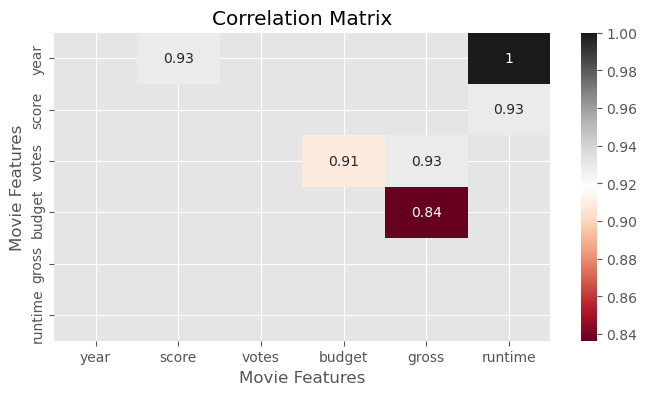

In [45]:
# Create a mask to exclude self-correlations and correlations below 0.5
mask = np.triu(np.ones(corr_matrix.shape)) & (corr_matrix > 0.5) & (corr_matrix != 1)

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix[mask], annot=True, cmap='RdGy')  # Apply mask to corr_matrix
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()


<div class="alert alert-block alert-success">
<b>6. Another way by sorting - </b> 
</div>



In [47]:
corr_matrix = df_num.corr()
corr_matrix
sorted_corr_pairs = corr_matrix.unstack().sort_values() # first we unstacked the matrix and then sorted.
sorted_corr_pairs.head(10)

budget   genre     -0.334021
genre    budget    -0.334021
         gross     -0.234297
gross    genre     -0.234297
votes    genre     -0.145296
genre    votes     -0.145296
score    country   -0.133348
country  score     -0.133348
rating   gross     -0.095450
gross    rating    -0.095450
dtype: float64

In [48]:
# Let's filter out useful values i.e higher values
high_corr = sorted_corr_pairs[(sorted_corr_pairs > .4) & (sorted_corr_pairs != 1)]
high_corr

score     votes       0.409182
votes     score       0.409182
          budget      0.486931
budget    votes       0.486931
gross     votes       0.632870
votes     gross       0.632870
gross     budget      0.750157
budget    gross       0.750157
Year_cor  year        0.996397
year      Year_cor    0.996397
dtype: float64

**Hypothesis 1:** Higher budgets are positively correlated with higher gross earnings.
Correlation between budget and gross: 0.750157
Conclusion: This is a strong positive correlation (close to 1), indicating that higher budgets tend to result in higher gross earnings. The data supports this hypothesis, suggesting that movies with larger financial investments generally perform better at the box office.<br>
**Hypothesis 2:** Movies with higher audience votes tend to have higher scores.
Correlation between votes and score: 0.409182
Conclusion: This is a moderate positive correlation, suggesting that movies with more audience votes tend to have higher scores. While the relationship is not as strong as budget vs. gross, the data still supports this hypothesis to some extent. It indicates that more popular movies (based on votes) are generally perceived as better in terms of quality.<br>
$In$ $summary:$

$Hypothesis 1: $ is strongly supported by the data.<br>
$Hypothesis 2: $ is moderately supported, indicating some positive relationship but with room for other influencing factors.

Current Date and Time: 2024-11-19 05:23:56.629807